# MATH387 Midterm
### Haruki Moriguchi
### March 17, 2018
---

## Part I. Theory

$(a)$ Since $f \in C^3[-a, a]$, by Taylor's theorem, there exists $\xi \in (-h, h)$ such that
$$f(h) = f(0) + hf'(0) + \frac{h^2}{2}f''(0) + \frac{h^3}{6}f'''(\xi)$$ and $$f(-h) = f(0) - hf'(0) + \frac{h^2}{2}f''(0) - \frac{h^3}{6}f'''(\xi)$$

Thus, by substituting and cancelling out terms, we get that for $0 < h < a$, there exists $\xi\in(-h, h)$ such that
  $$\tilde{D}_h - f'(0) = \frac{f(h) + \delta f(h) - f(-h) - \delta f(-h)}{2h} - f'(0)$$
  $$= \frac{f(h) - f(-h)}{2h} - f'(0) + \frac{\delta f(h) - \delta f(-h)}{2h}$$
  $$= \frac{2hf'(0) + \frac{h^3}{3}f'''(\xi)}{2h} - f'(0) + \frac{\delta f(h) - \delta f(-h)}{2h}$$
  $$= \frac{h^2}{6}f'''(\xi) + \frac{\delta f(h) - \delta f(-h)}{2h}$$

$(b)$ For $0 < h < a$, $|\delta f(h)| \le \varepsilon$ and $|\delta f(-h)| \le \varepsilon$ are given. Thus,
  $$\big|\tilde{D}_h - f'(0) \big| = \Big|\frac{h^2}{6}f'''(\xi) + \frac{\delta f(h) - \delta f(-h)}{2h}\Big|$$
  $$\le \frac{h^2}{6} \big|f'''(0) \big| + \frac{1}{2h} \big| \delta f(h) - \delta f(-h) \big|$$
  $$\le \frac{h^2}{6} \max_{x \in [-a, a]}\big|f'''(x) \big| + \frac{1}{2h}\left(\big| \delta f(h)\big| + \big| \delta f(-h)\big|\right)$$
  $$\le \frac{Mh^2}{6} + \frac \varepsilon h$$

<img src="sketch.jpg" alt="Drawing" style="width: 400px;"/>

To find the value of $h$ that minimizes $B(h)$, we solve $B'(h) = 0$:
  $$B'(h) = -\frac \varepsilon {h^2} + \frac M 3 h$$
  $$\implies 0 = -\varepsilon + \frac M 3 h^3$$
  $$\implies h = \sqrt[3]{\frac {3\varepsilon} M}$$
From the sketch, we know that if $h = \sqrt[3]{\frac {3\varepsilon} M}$ is a critical point, then it must be a minimum. \\
It is also not a good idea to choose $h$ to small because $B(h) \to \infty$ as $h \to 0^+$. The bound is arbitrarily large, and we would not obtain a good estimate for $\big| \tilde{D}_h - f'(0)\big|$.

Comment: begin{align} didn't work on github :(

---

## Part II. Lab

$(a)$ We use the function $f(x) = e^{-1/x^2}$.

In [434]:
import numpy as np
import scipy.special as sp
import matplotlib.pyplot as plt

In [435]:
def f(x):
    if type(x) is float and x == 0:
        return 0
    return np.exp(-1./(30*x**2))

In [436]:
def lagrangeInterpolation(xlist, x):
    n = len(xlist)
    p_n = 0
    for j in range(n):
        w = 1
        x_j = xlist[j]
        y_j = f(x_j)
        for k in range(n):
            if k == j:
                continue
            w *= (((x - xlist[k])/(x_j - xlist[k])))
        p_n += (y_j * w)
    return p_n

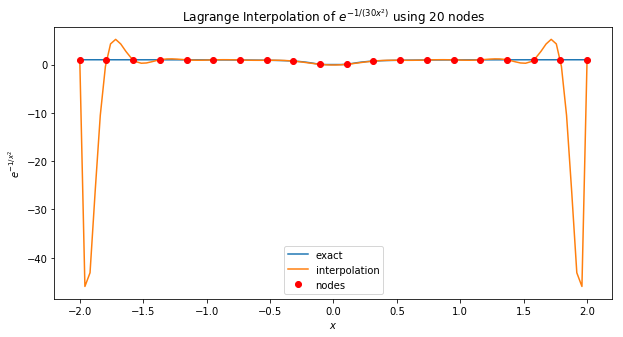

In [437]:
# 20 nodes within [-2, 2]
a = -2
b = 2
n = 20

x = np.linspace(a, b, 100)
xlist = np.linspace(a, b, n)

fig = plt.figure(figsize=(10, 5))
plt.plot(x, f(x), label="exact")
plt.plot(x, [lagrangeInterpolation(xlist, i) for i in x], label="interpolation")
plt.plot(xlist, [f(i) for i in xlist], 'ro', label="nodes")

plt.title(r'Lagrange Interpolation of $e^{-1/(30x^2)}$ using %d nodes'%n)
plt.xlabel(r'$x$')
plt.ylabel(r'$e^{-1/x^2}$')
plt.legend()
plt.show()

We can see that at the ends of the interpolation (near $x = \pm2$), the difference between the exact function and the polynomial is the greatest, exhibiting the Runge phenomenon.

---

$(b)$ We find that given the number of nodes $n$ and the interval $[a, b]$, the Chebyshev nodes are
$$x_j = \frac 1 2 (a+b) + \frac 1 2 (b-a)\cos\left(\frac{2j - 1}{2n}\right)$$
for $j \in \{1, \dots, n\}$.
Thus, we create a function that will return an array to use as our nodes in the Lagrange interpolation.

In [438]:
# Returns array of n chebyshev nodes in the interval [a, b]
def chebyshevNodes(a, b, n):
    p = .5*(a + b)
    q = .5*(b - a)
    return [p + q*np.cos(((2*k-1)*np.pi)/(2*n)) for k in range(1, n+1)]

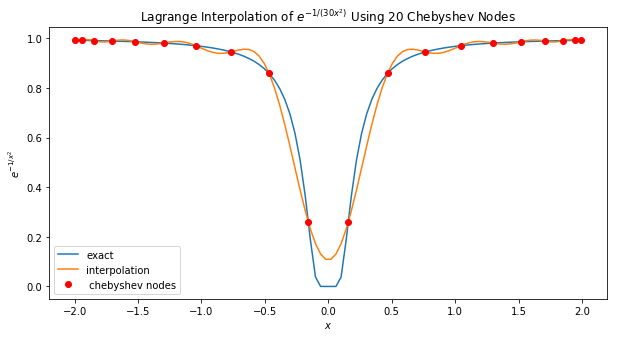

In [439]:
xlist = chebyshevNodes(a, b, n)

fig = plt.figure(figsize=(10, 5))
plt.plot(x, f(x), label="exact")
plt.plot(x, [lagrangeInterpolation(xlist, i) for i in x], label="interpolation")
plt.plot(xlist, [f(i) for i in xlist], 'ro', label=" chebyshev nodes")

plt.title(r'Lagrange Interpolation of $e^{-1/(30x^2)}$ Using %d Chebyshev Nodes'%n)
plt.xlabel(r'$x$')
plt.ylabel(r'$e^{-1/x^2}$')
plt.legend()
plt.show()

We obviously see that the error of the interpolation at the ends (near $x = \pm2$ are less severe. However, we also notice that by using Chebyshev nodes, we get more error near the center.

---

$(c)$ We implement Bernstein polynomials by using $$B_nf(x) = \sum_{j = 0}^n f\left(\frac j n\right) \binom j n x^j (1-x)^{n-j}.$$
We can only interpolate at $x \in [0, 1]$.

In [440]:
# Berstein polynomial with n equally spaced nodes evaluated at x
def bernstein(n, x):
    B = 0
    for j in range(0, n+1):
        B += (f(float(j)/n) * sp.binom(n, j) * x**j * (1 - x)**(n-j))
    return B

/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in divide
  after removing the cwd from sys.path.
/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  after removing the cwd from sys.path.


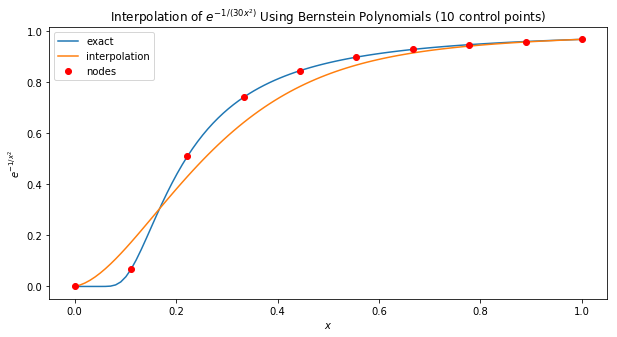

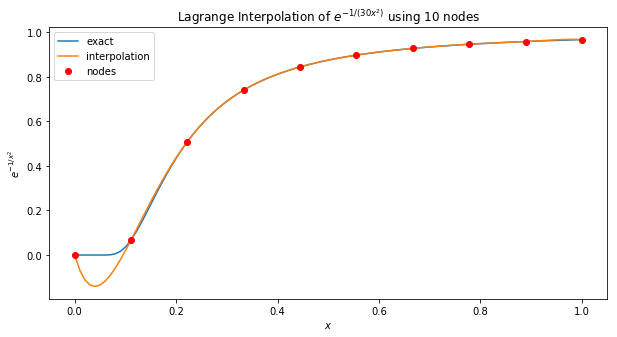

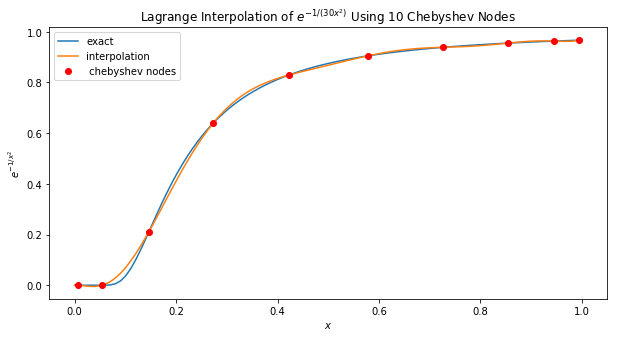

In [441]:
n = 10
x = np.linspace(0, 1, 100)
xlist = np.linspace(0, 1, n)

# Bernstein polynomial

fig = plt.figure(figsize=(10, 5))
plt.plot(x, f(x), label="exact")
plt.plot(x, [bernstein(n, i) for i in x], label="interpolation")
plt.plot(xlist, [f(i) for i in xlist], 'ro', label="nodes")

plt.title(r'Interpolation of $e^{-1/(30x^2)}$ Using Bernstein Polynomials (%d control points)'%n)
plt.xlabel(r'$x$')
plt.ylabel(r'$e^{-1/x^2}$')
plt.legend()
plt.show()


# Lagrange interpolation using equally spaced nodes

fig = plt.figure(figsize=(10, 5))
plt.plot(x, f(x), label="exact")
plt.plot(x, [lagrangeInterpolation(xlist, i) for i in x], label="interpolation")
plt.plot(xlist, [f(i) for i in xlist], 'ro', label="nodes")

plt.title(r'Lagrange Interpolation of $e^{-1/(30x^2)}$ using %d nodes'%n)
plt.xlabel(r'$x$')
plt.ylabel(r'$e^{-1/x^2}$')
plt.legend()
plt.show()


# Lagrange interpolation using Chebyshev nodes

xlist = chebyshevNodes(0, 1, n)

fig = plt.figure(figsize=(10, 5))
plt.plot(x, f(x), label="exact")
plt.plot(x, [lagrangeInterpolation(xlist, i) for i in x], label="interpolation")
plt.plot(xlist, [f(i) for i in xlist], 'ro', label=" chebyshev nodes")

plt.title(r'Lagrange Interpolation of $e^{-1/(30x^2)}$ Using %d Chebyshev Nodes'%n)
plt.xlabel(r'$x$')
plt.ylabel(r'$e^{-1/x^2}$')
plt.legend()
plt.show()

We see that with 10 nodes/control points, the Lagrange interpolation of $f$ in $[0, 1]$ is better towards the center but worse at the ends (especially near $x = 0$). The Lagrange polynomial oscillates between the concrol points, whereas the Berstein polynomial uses the control points to put more weight on certain areas of the function. If we add more control points, we see that the Bernstein polynomial gets closer and closer to the original function $f$ while the Lagrange polynomial still exhibits Runge phenomenon. However, using Chebyshev nodes for Lagrange interpolatin, we see that it is more accurate than all the methods for 10 and 50 control points.

/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in divide
  after removing the cwd from sys.path.
/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  after removing the cwd from sys.path.


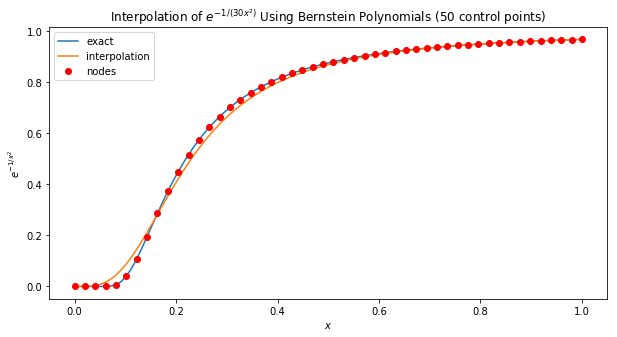

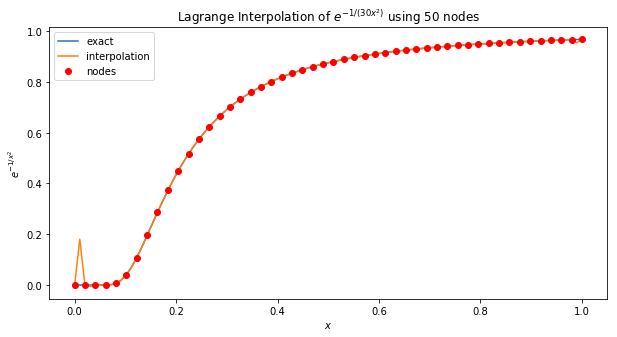

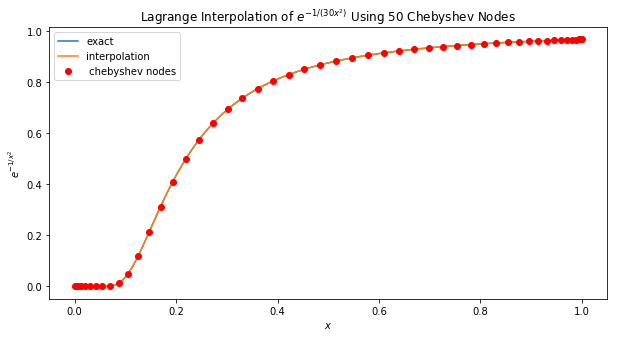

In [442]:
n = 50
xlist = np.linspace(0, 1, n)

# Bernstein polynomial

fig = plt.figure(figsize=(10, 5))
plt.plot(x, f(x), label="exact")
plt.plot(x, [bernstein(n, i) for i in x], label="interpolation")
plt.plot(xlist, [f(i) for i in xlist], 'ro', label="nodes")

plt.title(r'Interpolation of $e^{-1/(30x^2)}$ Using Bernstein Polynomials (%d control points)'%n)
plt.xlabel(r'$x$')
plt.ylabel(r'$e^{-1/x^2}$')
plt.legend()
plt.show()

# Lagrange interpolation using equally spaced nodes

fig = plt.figure(figsize=(10, 5))
plt.plot(x, f(x), label="exact")
plt.plot(x, [lagrangeInterpolation(xlist, i) for i in x], label="interpolation")
plt.plot(xlist, [f(i) for i in xlist], 'ro', label="nodes")

plt.title(r'Lagrange Interpolation of $e^{-1/(30x^2)}$ using %d nodes'%n)
plt.xlabel(r'$x$')
plt.ylabel(r'$e^{-1/x^2}$')
plt.legend()
plt.show()


# Lagrange interpolation using Chebyshev nodes

xlist = chebyshevNodes(0, 1, n)
fig = plt.figure(figsize=(10, 5))
plt.plot(x, f(x), label="exact")
plt.plot(x, [lagrangeInterpolation(xlist, i) for i in x], label="interpolation")
plt.plot(xlist, [f(i) for i in xlist], 'ro', label=" chebyshev nodes")

plt.title(r'Lagrange Interpolation of $e^{-1/(30x^2)}$ Using %d Chebyshev Nodes'%n)
plt.xlabel(r'$x$')
plt.ylabel(r'$e^{-1/x^2}$')
plt.legend()
plt.show()